In [299]:
from autograd import multigrad_dict
from sympy import symbols
import numdifftools as nd
import numpy as np
import matplotlib.pyplot as plt
import numdifftools as nd
%matplotlib inline


In [247]:
alpha = 0.01
e = 0.1 
x = [1, 1]


In [246]:
def func(x): 
    return 2*x[0]**2 + 5*x[1]**2 + x[0]*x[1] - 3*x[0] - x[1] + 5

In [250]:
def grad(x):
    return nd.Gradient(func)([x[0], x[1]])


In [251]:
def norm(gr):
    return np.sqrt(float(gr[0])**2 + float(gr[1])**2)

In [259]:
def find_min(alpha, e, x):
    gr = grad(x)

    while norm(gr) > e:
        if func(x - alpha * gr) < func(x):
            x -= alpha * gr
        else:
            alpha = 0.5 * alpha
        gr = grad(x)
      
    x_min = x 
    f_min = func(x)
    return [x_min, f_min]

In [304]:
x_min = find_min(alpha, e, x)[0]
f_min = find_min(alpha, e, x)[1]
print(f'Минимум функции достигается в точке с координатами ({x_min[0]}; {f_min}; {x_min[1]})') 

Минимум функции достигается в точке с координатами (0.7605800988872924; 3.8725553964434707; 0.03022870484922386)


In [270]:
def f(x1, x2):
    return 2 * x1 * x1 + 5 * x2 * x2 + x1 * x2 - 3 * x1 - x2 + 5 

In [297]:
def plot_3d(x_min, f_min, POV=[45, 40]):
    dot = x_min * 10
    fig = plt.figure(figsize=(20, 12))
    ax = plt.axes(projection='3d')
    
    X, Y = np.meshgrid(np.linspace(-abs(dot[0]), abs(dot[0]), 1000), np.linspace(-abs(dot[1]), abs(dot[1]), 1000)) 
    Z = f(X, Y)
    
    ax.plot_wireframe(X, Y, Z, color ='orange')
    ax.scatter(x_min[0], x_min[1], f_min, c='red', s=60)
    ax.view_init(POV[0], POV[1])
    plt.show()

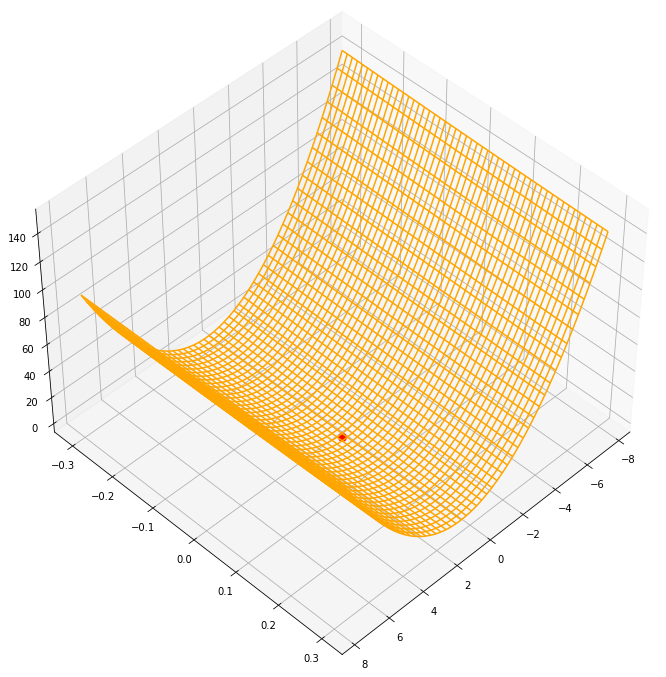

In [298]:
plot_3d(x_min, f_min, POV=[45, 45]) 